index


gender: 성별


car: 차량 소유 여부


reality: 부동산 소유 여부


child_num: 자녀 수


income_total: 연간 소득


income_type: 소득 분류


							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']



edu_type: 교육 수준


							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']



family_type: 결혼 여부


							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']



house_type: 생활 방식


							['Municipal apartment', 'House / apartment', 'With parents',

							

							 'Co-op apartment', 'Rented apartment', 'Office apartment']



DAYS_BIRTH: 출생일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



DAYS_EMPLOYED: 업무 시작일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

													

							양수 값은 고용되지 않은 상태를 의미함



FLAG_MOBIL: 핸드폰 소유 여부


work_phone: 업무용 전화 소유 여부


phone: 전화 소유 여부


email: 이메일 소유 여부


occyp_type: 직업 유형													


family_size: 가족 규모


begin_month: 신용카드 발급 월
			

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미







credit: 사용자의 신용카드 대금 연체를 기준의 신용도


							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함



In [1]:
import os
import warnings
import pandas as pd 
import numpy as np 

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
plt.style.use("ggplot")

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data_path = os.listdir('data')

In [4]:
data_path

['test.csv', 'train.csv', 'sample_submission.csv']

In [6]:
train_data = pd.read_csv(os.path.join("data" ,data_path[1]))
test_data = pd.read_csv(os.path.join("data", data_path[0]))

In [275]:
submission = pd.read_csv(os.path.join("data", data_path[2]))

In [276]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [8]:
# head
train_data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [9]:
test_data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [10]:
set(train_data.columns) - set(test_data.columns)

{'credit'}

In [12]:
train_data.shape, test_data.shape

((26457, 20), (10000, 19))

In [13]:
train_data.drop_duplicates().shape

(26457, 20)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [18]:
# na
(train_data.isna().sum() / len(train_data) ) * 100

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64

In [19]:
(test_data.isna().sum() / len(test_data)) * 100

index             0.00
gender            0.00
car               0.00
reality           0.00
child_num         0.00
income_total      0.00
income_type       0.00
edu_type          0.00
family_type       0.00
house_type        0.00
DAYS_BIRTH        0.00
DAYS_EMPLOYED     0.00
FLAG_MOBIL        0.00
work_phone        0.00
phone             0.00
email             0.00
occyp_type       31.52
family_size       0.00
begin_month       0.00
dtype: float64

In [20]:
# train, test concat
dataset = pd.concat([train_data.drop("credit" , axis=1), test_data])

In [21]:
dataset.shape

(36457, 19)

In [22]:
for col in dataset.columns:
    print(f"{col} : The number of unique : {dataset[col].nunique()}")
    print()

index : The number of unique : 36457

gender : The number of unique : 2

car : The number of unique : 2

reality : The number of unique : 2

child_num : The number of unique : 9

income_total : The number of unique : 265

income_type : The number of unique : 5

edu_type : The number of unique : 5

family_type : The number of unique : 5

house_type : The number of unique : 6

DAYS_BIRTH : The number of unique : 7183

DAYS_EMPLOYED : The number of unique : 3640

FLAG_MOBIL : The number of unique : 1

work_phone : The number of unique : 2

phone : The number of unique : 2

email : The number of unique : 2

occyp_type : The number of unique : 18

family_size : The number of unique : 10

begin_month : The number of unique : 61



In [23]:
cat_cols = "gender car reality child_num income_type edu_type family_type house_type FLAG_MOBIL work_phone phone email occyp_type family_size".split()

In [24]:
cat_cols

['gender',
 'car',
 'reality',
 'child_num',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'occyp_type',
 'family_size']

In [25]:
not_cat_cols = list(set(dataset.columns) - set(cat_cols))

In [26]:
not_cat_cols

['index', 'begin_month', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'income_total']

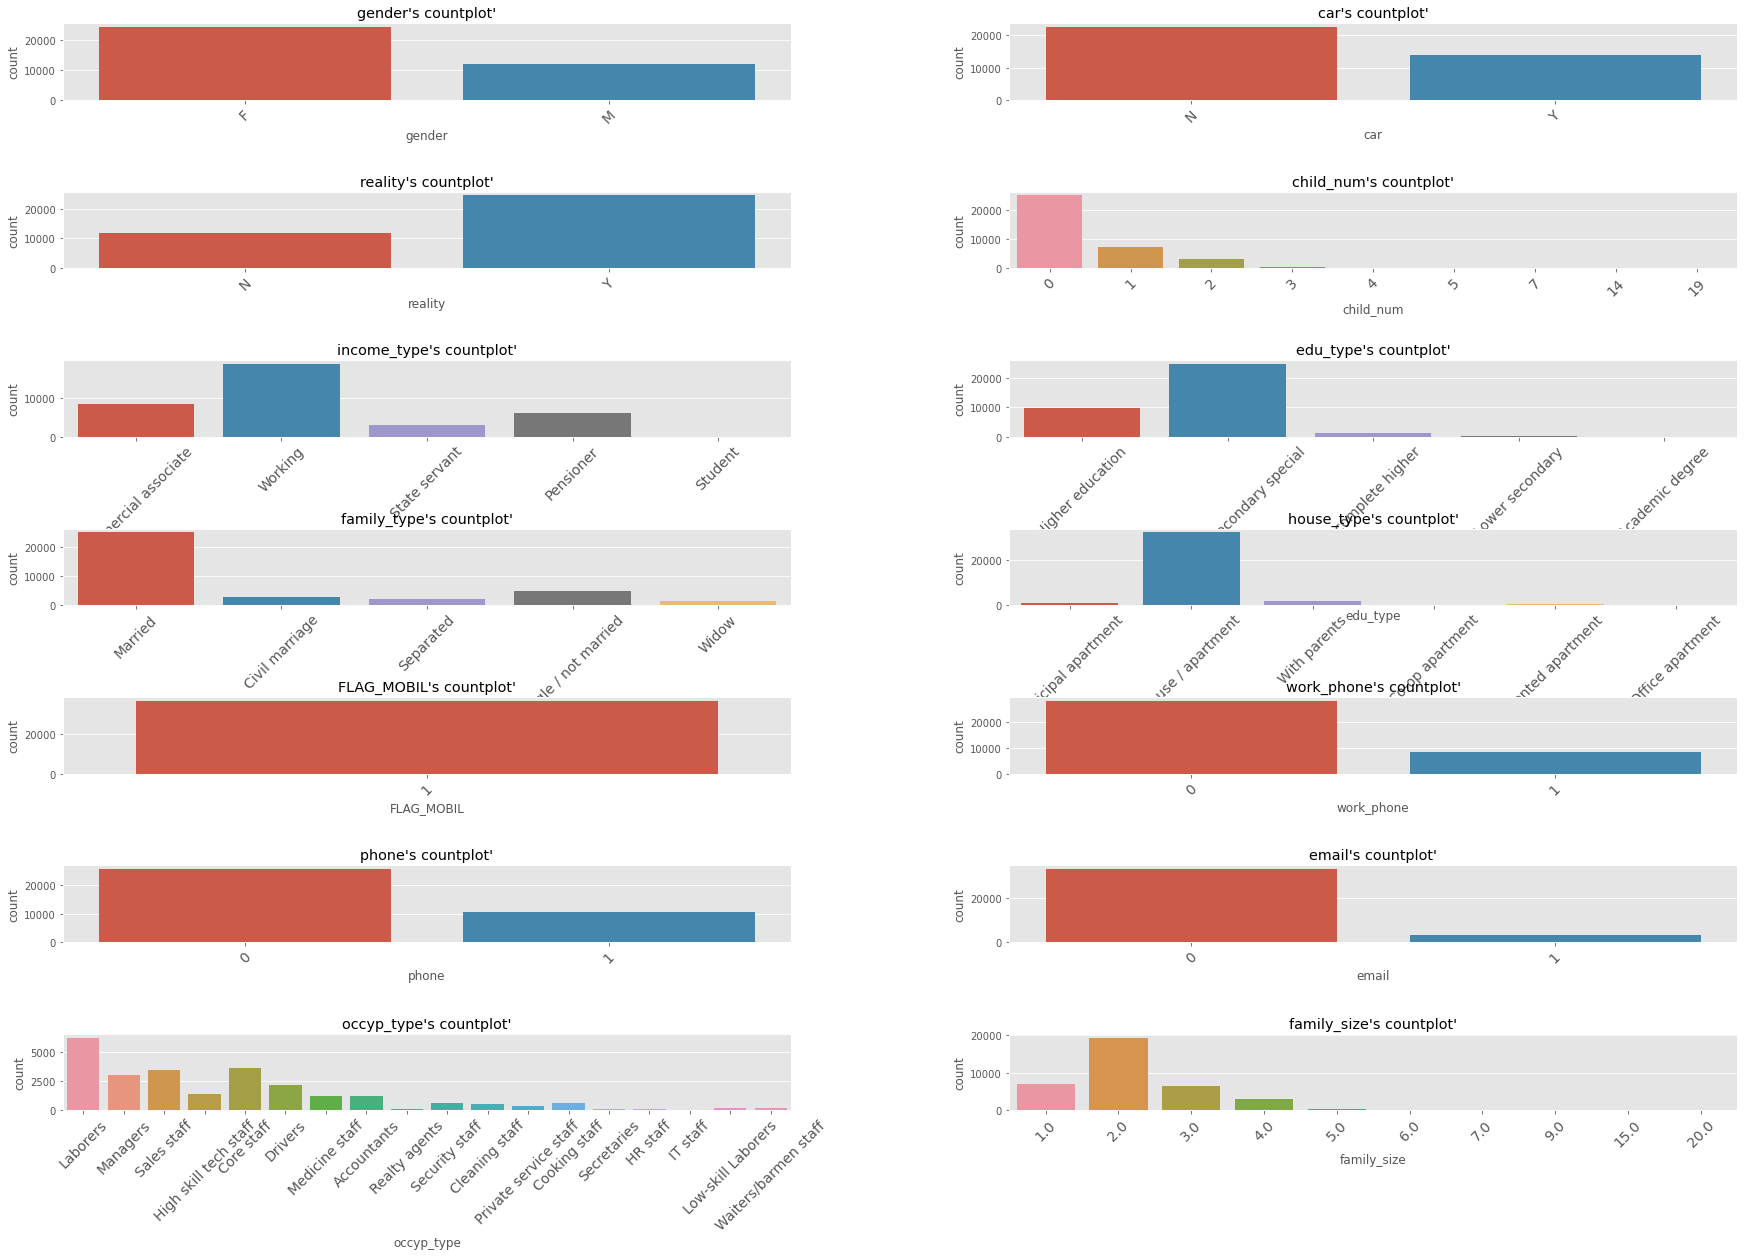

In [47]:
num = len(cat_cols) // 2
plt.figure(figsize=(30,20))
for i, col in enumerate(cat_cols):
    plt.subplot(num, 2, i+1)
    sns.countplot(data=dataset, x=col)
    plt.title(f"{col}'s countplot'")
    plt.xticks(rotation=45, fontsize=14)
    plt.subplots_adjust(wspace=0.3, hspace=1.2)

plt.show()

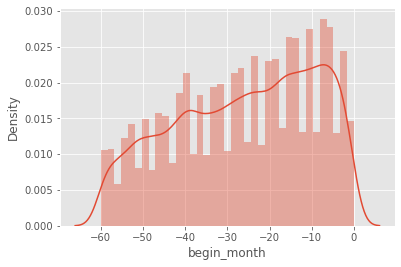

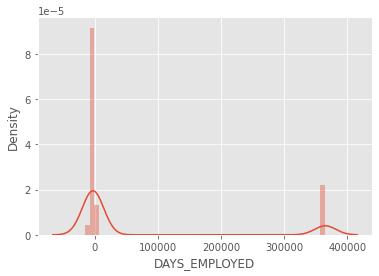

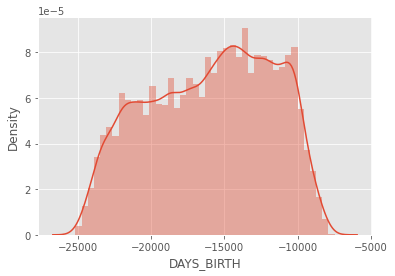

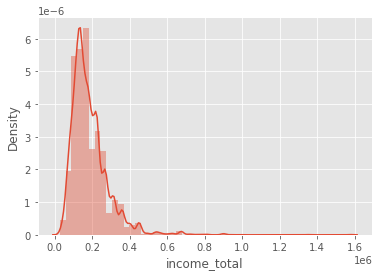

In [50]:
for col in not_cat_cols:
    if col == "index":
        continue
    sns.distplot(dataset[col])
    plt.show()

<AxesSubplot:xlabel='credit', ylabel='Density'>

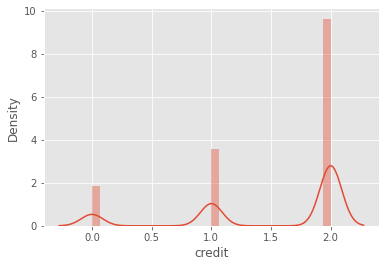

In [51]:
sns.distplot(train_data["credit"])

In [52]:
train_data["credit"].unique()

array([1., 2., 0.])

<AxesSubplot:xlabel='credit', ylabel='count'>

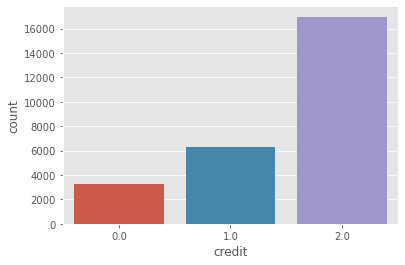

In [53]:
sns.countplot(train_data["credit"])

<AxesSubplot:>

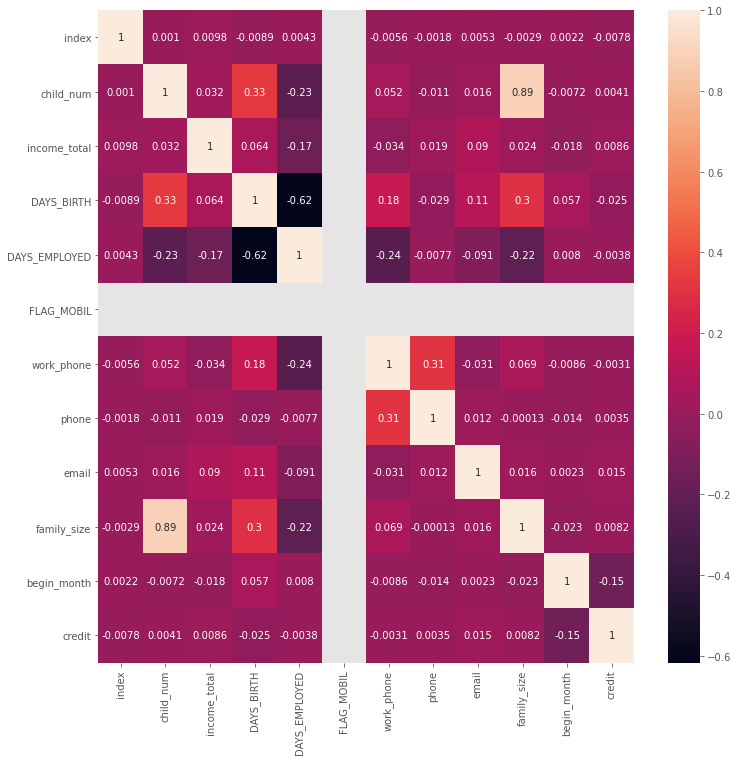

In [57]:
cor = train_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor, annot=True)

In [68]:
train_data[train_data['child_num'] >= 14]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
8462,8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-7.0,2.0
9021,9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-58.0,2.0
10731,10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0
25390,25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-43.0,2.0


In [66]:
test_data[test_data['child_num'] > 3]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
387,26844,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-9.0
494,26951,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-55.0
1574,28031,F,N,Y,4,261000.0,Working,Secondary / secondary special,Married,House / apartment,-12475,-1588,1,0,0,0,High skill tech staff,6.0,-41.0
2543,29000,M,Y,Y,4,157500.0,Working,Higher education,Married,House / apartment,-11380,-1734,1,0,0,0,Managers,6.0,-20.0
3772,30229,F,Y,Y,4,157500.0,State servant,Secondary / secondary special,Separated,House / apartment,-13994,-4185,1,1,1,0,Security staff,5.0,-4.0
4130,30587,F,Y,Y,4,112500.0,Working,Higher education,Married,House / apartment,-13671,-1974,1,0,0,0,Core staff,6.0,-59.0
4234,30691,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-37.0
4807,31264,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-11.0
6105,32562,M,Y,N,5,211500.0,Working,Secondary / secondary special,Married,House / apartment,-13817,-1892,1,1,0,0,Laborers,7.0,-23.0
6521,32978,M,Y,Y,4,67500.0,Working,Secondary / secondary special,Married,House / apartment,-13740,-2064,1,0,0,0,Core staff,6.0,-7.0


In [62]:
dataset['child_num'].unique()

array([ 0,  1,  2,  3,  4,  5, 14, 19,  7])

In [67]:
test_data['child_num'].unique()

array([0, 1, 2, 3, 5, 4])

In [71]:
# 나이 추가
dataset['AGE'] = -1 * (dataset['DAYS_BIRTH'] // 365)

In [73]:
# 31살에 자식이 19명 가능? 
# 49살에 자식이 14명 가능?
dataset[train_data["child_num"] >= 14]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,AGE
8462,8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-7.0,49
9021,9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-58.0,49
10731,10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,31
25390,25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-43.0,49
8462,34919,F,Y,Y,0,247500.0,Commercial associate,Higher education,Married,House / apartment,-14462,-1871,1,0,1,1,NaN,2.0,-31.0,40
9021,35478,F,N,Y,0,292500.0,Commercial associate,Higher education,Married,House / apartment,-18942,-4854,1,1,0,0,Sales staff,2.0,-56.0,52


In [78]:
# 신용카드를 몇 년동안 썼는지
dataset["how_long_credit"] = -1 * (dataset["begin_month"] / 12)
dataset["how_long_credit"] = round(dataset["how_long_credit"], 2)

In [80]:
# 근속 년수
dataset["how_long_work"] = -1 * (dataset["DAYS_EMPLOYED"] / 365)
dataset["how_long_work"] = round(dataset["how_long_work"], 2)

In [100]:
dataset[dataset["how_long_work"] < 0]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,AGE,how_long_credit,how_long_work
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,0,NaN,1.0,-41.0,63,3.42,-1000.67
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,NaN,2.0,-37.0,64,3.08,-1000.67
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,NaN,2.0,-7.0,59,0.58,-1000.67
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,0,NaN,1.0,-5.0,62,0.42,-1000.67
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,1,0,1,0,NaN,1.0,-24.0,58,2.00,-1000.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,36425,F,Y,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,NaN,2.0,-43.0,56,3.58,-1000.67
9981,36438,M,Y,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,NaN,2.0,-49.0,65,4.08,-1000.67
9988,36445,F,N,N,0,117000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,1,0,0,0,NaN,1.0,-27.0,54,2.25,-1000.67
9992,36449,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,NaN,2.0,-30.0,63,2.50,-1000.67


In [103]:
# 같은 사람 데이터도 존재 
# 결혼 안했다가 결혼을 한 경우도 생기고 소득이 증가한 경우도 생김
dataset[dataset["how_long_work"] < 0].drop(["index", "begin_month", "how_long_credit"],axis=1).drop_duplicates()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,AGE,how_long_work
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,63,-1000.67
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,64,-1000.67
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,59,-1000.67
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,62,-1000.67
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,58,-1000.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-13367,365243,1,0,1,0,NaN,2.0,37,-1000.67
9944,F,N,Y,0,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19390,365243,1,0,1,0,NaN,2.0,54,-1000.67
9946,F,N,N,0,193500.0,Pensioner,Higher education,Widow,House / apartment,-22010,365243,1,0,0,0,NaN,1.0,61,-1000.67
9954,F,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23013,365243,1,0,0,0,NaN,2.0,64,-1000.67


In [83]:
# 이쯤에서 통계량확인 한 번
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
index,36457.0,18228.000000,10524.373719,0.00,9114.00,18228.00,27342.00,36456.00
child_num,36457.0,0.430315,0.742367,0.00,0.00,0.00,1.00,19.00
income_total,36457.0,186685.736662,101789.226482,27000.00,121500.00,157500.00,225000.00,1575000.00
DAYS_BIRTH,36457.0,-15975.173382,4200.549944,-25152.00,-19438.00,-15563.00,-12462.00,-7489.00
DAYS_EMPLOYED,36457.0,59262.935568,137651.334859,-15713.00,-3153.00,-1552.00,-408.00,365243.00
FLAG_MOBIL,36457.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
work_phone,36457.0,0.225526,0.417934,0.00,0.00,0.00,0.00,1.00
phone,36457.0,0.294813,0.455965,0.00,0.00,0.00,1.00,1.00
email,36457.0,0.089722,0.285787,0.00,0.00,0.00,0.00,1.00
family_size,36457.0,2.198453,0.911686,1.00,2.00,2.00,3.00,20.00


<AxesSubplot:xlabel='credit', ylabel='count'>

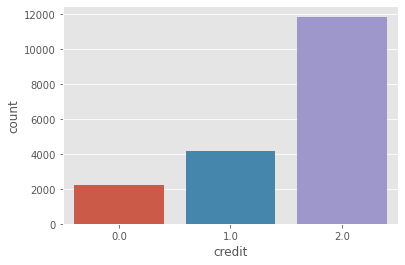

In [87]:
# merried랑 civil merriage랑 차이가 뭐냐
sns.countplot(train_data[train_data["family_type"] =="Married"]['credit'])

<AxesSubplot:xlabel='credit', ylabel='count'>

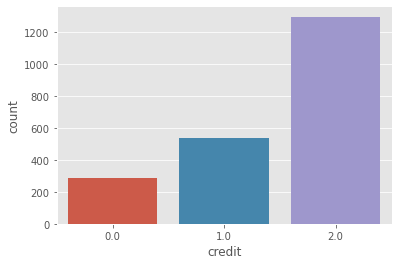

In [88]:
sns.countplot(train_data[train_data["family_type"] =="Civil marriage"]['credit'])

In [89]:
# married랑 Civil marriage 하나로 맞춰주자
dataset["family_type"] = dataset["family_type"].map(lambda x : "Married" if x == "Civil marriage" else x) 

In [90]:
dataset["family_type"].unique()

array(['Married', 'Separated', 'Single / not married', 'Widow'],
      dtype=object)

In [99]:
# income이 꼭 높아야만 신용이 좋은 것은 아님
train_data.groupby("credit")['income_total'].mean()

credit
0.0    190807.582402
1.0    181122.701532
2.0    188925.666991
Name: income_total, dtype: float64

In [105]:
# occyp_type
occyp = dataset["occyp_type"].unique()
occyp

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [116]:
for i in occyp:
    if type(i) == float:
        continue
    temp = dataset[dataset["occyp_type"] == i].groupby("occyp_type")["income_total"].mean()
    display(temp)

occyp_type
Laborers    179794.282402
Name: income_total, dtype: float64

occyp_type
Managers    279117.292829
Name: income_total, dtype: float64

occyp_type
Sales staff    174984.897848
Name: income_total, dtype: float64

occyp_type
High skill tech staff    196053.579176
Name: income_total, dtype: float64

occyp_type
Core staff    190172.786967
Name: income_total, dtype: float64

occyp_type
Drivers    209797.240412
Name: income_total, dtype: float64

occyp_type
Medicine staff    166114.618061
Name: income_total, dtype: float64

occyp_type
Accountants    202463.865834
Name: income_total, dtype: float64

occyp_type
Realty agents    247500.0
Name: income_total, dtype: float64

occyp_type
Security staff    177037.753378
Name: income_total, dtype: float64

occyp_type
Cleaning staff    149141.107078
Name: income_total, dtype: float64

occyp_type
Private service staff    198863.372093
Name: income_total, dtype: float64

occyp_type
Cooking staff    146517.251908
Name: income_total, dtype: float64

occyp_type
Secretaries    168079.470199
Name: income_total, dtype: float64

occyp_type
HR staff    193764.705882
Name: income_total, dtype: float64

occyp_type
IT staff    199860.0
Name: income_total, dtype: float64

occyp_type
Low-skill Laborers    133920.0
Name: income_total, dtype: float64

occyp_type
Waiters/barmen staff    156206.896552
Name: income_total, dtype: float64

In [311]:
temp = train_data.groupby(["occyp_type","credit"])["income_total"].count().unstack()

In [313]:
temp_list = []
for i in temp.itertuples():
    print(i)
    temp_list.append(sum(i[1:]))

temp["total"] = temp_list

Pandas(Index='Accountants', _1=118, _2=227, _3=557)
Pandas(Index='Cleaning staff', _1=40, _2=93, _3=270)
Pandas(Index='Cooking staff', _1=58, _2=110, _3=289)
Pandas(Index='Core staff', _1=347, _2=622, _3=1677)
Pandas(Index='Drivers', _1=187, _2=358, _3=1030)
Pandas(Index='HR staff', _1=7, _2=4, _3=51)
Pandas(Index='High skill tech staff', _1=123, _2=270, _3=647)
Pandas(Index='IT staff', _1=8, _2=10, _3=23)
Pandas(Index='Laborers', _1=586, _2=1082, _3=2844)
Pandas(Index='Low-skill Laborers', _1=22, _2=21, _3=84)
Pandas(Index='Managers', _1=280, _2=458, _3=1429)
Pandas(Index='Medicine staff', _1=83, _2=191, _3=590)
Pandas(Index='No Jobs', _1=536, _2=1084, _3=2820)
Pandas(Index='Private service staff', _1=35, _2=55, _3=153)
Pandas(Index='Realty agents', _1=10, _2=9, _3=44)
Pandas(Index='Sales staff', _1=293, _2=650, _3=1596)
Pandas(Index='Secretaries', _1=9, _2=31, _3=57)
Pandas(Index='Security staff', _1=39, _2=88, _3=297)
Pandas(Index='Waiters/barmen staff', _1=10, _2=50, _3=64)


In [147]:
for col in temp.columns:
    if col == "total":
        continue
    temp[col] = (temp[col] / temp["total"]) * 100

In [148]:
# 직업이랑 신용등급이랑 그렇게 큰 관련이 없는걸로
temp

credit,0.0,1.0,2.0,total
occyp_type,,,,
Accountants,13.082040,25.166297,61.751663,902
Cleaning staff,9.925558,23.076923,66.997519,403
Cooking staff,12.691466,24.070022,63.238512,457
Core staff,13.114135,23.507181,63.378685,2646
Drivers,11.873016,22.730159,65.396825,1575
HR staff,11.290323,6.451613,82.258065,62
High skill tech staff,11.826923,25.961538,62.211538,1040
IT staff,19.512195,24.390244,56.097561,41
Laborers,12.987589,23.980496,63.031915,4512


In [156]:
(dataset["house_type"].value_counts() / len(dataset)) * 100

House / apartment      89.277779
With parents            4.871492
Municipal apartment     3.094056
Rented apartment        1.577201
Office apartment        0.718655
Co-op apartment         0.460817
Name: house_type, dtype: float64

In [160]:
train_data.groupby(["house_type", "credit"]).size()

house_type           credit
Co-op apartment      0.0          14
                     1.0          30
                     2.0          66
House / apartment    0.0        2873
                     1.0        5569
                     2.0       15211
Municipal apartment  0.0         110
                     1.0         160
                     2.0         548
Office apartment     0.0          24
                     1.0          48
                     2.0         118
Rented apartment     0.0          50
                     1.0         147
                     2.0         232
With parents         0.0         151
                     1.0         313
                     2.0         793
dtype: int64

In [165]:
train_data.groupby(["child_num", "credit"]).size() 

child_num  credit
0          0.0        2233
           1.0        4322
           2.0       11785
1          0.0         682
           1.0        1313
           2.0        3391
2          0.0         268
           1.0         535
           2.0        1559
3          0.0          29
           1.0          79
           2.0         198
4          0.0           8
           1.0          12
           2.0          27
5          0.0           2
           1.0           6
           2.0           2
7          2.0           2
14         2.0           3
19         2.0           1
dtype: int64

In [166]:
# 아 모르겠다 일단 모델이나 한 번 돌려보자
dataset = dataset.reset_index(drop=True)
dataset = dataset.drop([8462, 9021, 10731, 25390]).reset_index(drop=True)

In [167]:
dataset2 = dataset.copy()
# dataset = dataset.fillna("Laborers")

In [170]:
dataset[dataset["how_long_work"] < 0]['income_type'].unique()

array(['Pensioner'], dtype=object)

In [173]:
dataset[dataset["how_long_work"] < 0]["AGE"].min()

23

In [174]:
dataset[dataset["how_long_work"] < 0]["AGE"].mean()

60.12942135289324

In [210]:
# Na 채우기
dataset[dataset["how_long_work"] < 0] = dataset[dataset["how_long_work"] < 0].fillna("No Jobs") 

In [222]:
dataset[dataset['income_type'] == "Pensioner"] = dataset[dataset['income_type'] == "Pensioner"].fillna("No Jobs")

In [226]:
dataset[dataset['income_type'] == 'Student'] = dataset[dataset['income_type'] == 'Student'].fillna('No Jobs')

In [237]:
temp = dataset[dataset['income_type'] == "Working"]

In [242]:
temp_index = temp[temp['occyp_type'].isna() == True].index

In [243]:
dataset.iloc[temp_index] = dataset.iloc[temp_index].fillna("Laborers")

In [247]:
dataset[dataset["income_type"] == "State servant"] = dataset[dataset["income_type"] == "State servant"].fillna("other공무원")

In [251]:
dataset[dataset["income_type"] == "Commercial associate"] = dataset[dataset["income_type"] == "Commercial associate"].fillna("Laborers")

In [254]:
dataset.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,AGE,how_long_credit,how_long_work
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,1,0,0,0,Laborers,2.0,-6.0,39,0.50,12.90
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,0,1,Laborers,3.0,-5.0,32,0.42,4.22
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,1,0,1,0,Managers,2.0,-22.0,53,1.83,12.15
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,Sales staff,2.0,-37.0,42,3.08,5.73
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,1,0,0,0,Managers,2.0,-26.0,42,2.17,5.77


In [258]:
dataset.edu_type.unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [255]:
dataset3 = dataset.copy()

In [261]:
dataset.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'AGE', 'how_long_credit', 'how_long_work'],
      dtype='object')

In [257]:
dataset.drop(['index','FLAG_MOBIL','begin_month','DAYS_BIRTH',"DAYS_EMPLOYED"], axis=1, inplace=True)

In [259]:
dataset['income_total'] = dataset['income_total'].map(np.log1p)

In [263]:
final_data = pd.get_dummies(dataset)

In [264]:
train_data.shape

(26457, 20)

In [265]:
final_data.shape

(36453, 55)

In [271]:
x_train = final_data.iloc[:26453]
x_test = final_data.iloc[26453:]

In [303]:
y_train = train_data["credit"]
y_train = y_train.drop([8462, 9021, 10731, 25390]).reset_index(drop=True)

In [278]:
# y_train = pd.get_dummies(y_train)

In [272]:
from sklearn.ensemble import RandomForestClassifier

In [273]:
rfc = RandomForestClassifier(n_estimators=350,random_state=123)

In [304]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=350, random_state=123)

In [305]:
pred = rfc.predict_proba(x_test)

In [306]:
pred

array([[0.04857143, 0.17428571, 0.77714286],
       [0.52      , 0.19809524, 0.28190476],
       [0.03428571, 0.03857143, 0.92714286],
       ...,
       [0.00285714, 0.02857143, 0.96857143],
       [0.62428571, 0.25285714, 0.12285714],
       [0.12019048, 0.266     , 0.61380952]])

In [308]:
submission[["0","1","2"]] = pred

In [317]:
type(submission[["0","1","2"]])

pandas.core.frame.DataFrame

In [310]:
# n_estimator 350
submission.to_csv("baseline_rf_350.csv", index=False)

In [ ]:
# 카드를 여러장 발급 받았는지의 여부